In [1]:
# imports
from __future__ import division
import numpy as np
from collections import namedtuple
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
# Original MINC network on our images

import minc_model.copy_minc_labeled_surface_images
import minc_model.test
reload(minc_model)
reload(minc_model.copy_minc_labeled_surface_images)

minc_model.copy_minc_labeled_surface_images.go()

/x/alexburka/20170221/stickcam/2/surface.png
/x/alexburka/20170221/optocam/2/surface.png
/x/alexburka/20170222/biocam/2/surface.png
/x/alexburka/20170221/stickcam/3/surface.png
/x/alexburka/20170221/optocam/3/surface.png
/x/alexburka/20170222/biocam/3/surface.png
/x/alexburka/20170221/stickcam/48/surface.png
/x/alexburka/20170222/optocam/1/surface.png
/x/alexburka/20170223/biocam/20/surface.png
/x/alexburka/20170221/stickcam/52/surface.png
/x/alexburka/20170222/optocam/5/surface.png
/x/alexburka/20170223/biocam/24/surface.png
/x/alexburka/20170221/stickcam/34/surface.png
/x/alexburka/20170221/optocam/35/surface.png
/x/alexburka/20170223/biocam/3/surface.png
/x/alexburka/20170221/stickcam/31/surface.png
/x/alexburka/20170221/optocam/32/surface.png
/x/alexburka/20170222/biocam/30/surface.png
/x/alexburka/20170221/stickcam/15/surface.png
/x/alexburka/20170221/optocam/14/surface.png
/x/alexburka/20170222/biocam/14/surface.png
/x/alexburka/20170221/stickcam/30/surface.png
/x/alexburka/20170

In [47]:
answers, confusion, categories, net = minc_model.test.classify_images('googlenet')
accuracy = np.sum(np.diag(np.array(confusion.values())))/np.sum(np.array(confusion.values()))

OrigMinc = namedtuple('OrigMinc', ['acc', 'net', 'answers', 'confusion', 'materials'])
orig_minc = OrigMinc(accuracy, net, answers, confusion, categories)

googlenet images/brick/20170303_biocam_8.png stone 0.937407 False
googlenet images/brick/20170303_optocam_9.png stone 0.634154 False
googlenet images/brick/20170303_stickcam_15.png polishedstone 0.831786 False
googlenet images/brick/20170407_optocam_10.png stone 0.774483 False
googlenet images/brick/20170413_stickcam_10.png stone 0.641102 False
googlenet images/brick/20170413_stickcam_12.png stone 0.69984 False
googlenet images/brick/20170418_optocam_12.png painted 0.341726 False
googlenet images/brick/20170418_optocam_15.png stone 0.227097 False
googlenet images/brick/20170418_optocam_17.png stone 0.854124 False
googlenet images/brick/20170418_optocam_18.png stone 0.360229 False
googlenet images/brick/20170418_optocam_4.png stone 0.767872 False
googlenet images/brick/20170419_stickcam_3.png stone 0.683206 False
googlenet images/brick/20170419_stickcam_4.png stone 0.755649 False
googlenet images/brick/20170419_stickcam_6.png carpet 0.919335 False
googlenet images/brick/20170419_stickca

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(np.array(confusion.values(), dtype=np.float), interpolation='nearest', cmap='Greys')

NameError: name 'confusion' is not defined

In [23]:
import sys
sys.path.insert(0, '/home/alexburka/caffe/python')
import caffe
import numpy as np

caffe.set_device(0)
caffe.set_mode_gpu()

def resize_image(image, new_shape):
    old_shape = image.shape[0:2]
    if abs(old_shape[0] - new_shape[0]) > abs(old_shape[1] - new_shape[1]):
        intermediate_shape = (round(old_shape[0] * new_shape[1] / old_shape[1]), new_shape[1])
        intermediate = caffe.io.resize_image(image, intermediate_shape)
        start = int(round((intermediate_shape[0] - new_shape[0])/2))
        return intermediate[start:(start+new_shape[0]),:,:]
    else:
        intermediate_shape = (new_shape[0], round(old_shape[1] * new_shape[0] / old_shape[0]))
        intermediate = caffe.io.resize_image(image, intermediate_shape)
        start = int(round((intermediate_shape[1] - new_shape[1])/2))
        return intermediate[:,start:(start+new_shape[1]),:]
    
def top_k(net, img, k):
    outputs = minc_net.predict([img*255], oversample=True, all_outputs=True)
    probs = outputs['prob'][0]
    top = (-probs).argsort()[:k]
    print [(100*probs[i], categories[i]) for i in top]
    for p in ['w', 'h', 'r', 'ss', 'so', 'sb']:
        out = outputs['prob-%s' % p][0]
        print p, out.argmax()+1

categories=[x.strip() for x in open('minc_model/categories.txt').readlines()]

arch = 'alexnet'
minc_net = caffe.Classifier('minc_model/deploy-{}.finetune.prototxt'.format(arch),'minc_model/minc-{}.caffemodel'.format(arch),channel_swap=(2,1,0),mean=np.array([104,117,124]))

[(72.891616821289062, 'polishedstone'), (13.115638494491577, 'carpet'), (12.743878364562988, 'stone'), (0.35939167719334364, 'tile'), (0.26277503930032253, 'fabric')]
w 1
h 1
r 1
ss 1
so 1
sb 1


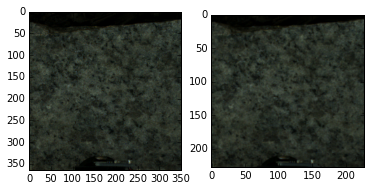

In [24]:
img = caffe.io.load_image('minc_model/images/polishedstone/20170418_optocam_3.png')
resized = resize_image(img, minc_net.image_dims)

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(resized)
top_k(minc_net, resized, 5)

In [26]:
import h5py

ImportError: libhdf5.so.7: cannot open shared object file: No such file or directory

In [109]:
## copied from http://nbviewer.jupyter.org/github/BVLC/caffe/blob/master/examples/02-fine-tuning.ipynb

from caffe.proto import caffe_pb2

def solver(train_net_path, test_net_path=None, base_lr=0.001):
    s = caffe_pb2.SolverParameter()

    # Specify locations of the train and (maybe) test networks.
    s.train_net = train_net_path
    if test_net_path is not None:
        s.test_net.append(test_net_path)
        s.test_interval = 1000  # Test after every 1000 training iterations.
        s.test_iter.append(100) # Test on 100 batches each time we test.

    # The number of iterations over which to average the gradient.
    # Effectively boosts the training batch size by the given factor, without
    # affecting memory utilization.
    s.iter_size = 1
    
    s.max_iter = 100000     # # of times to update the net (training iterations)
    
    # Solve using the stochastic gradient descent (SGD) algorithm.
    # Other choices include 'Adam' and 'RMSProp'.
    s.type = 'SGD'

    # Set the initial learning rate for SGD.
    s.base_lr = base_lr

    # Set `lr_policy` to define how the learning rate changes during training.
    # Here, we 'step' the learning rate by multiplying it by a factor `gamma`
    # every `stepsize` iterations.
    s.lr_policy = 'step'
    s.gamma = 0.1
    s.stepsize = 20000

    # Set other SGD hyperparameters. Setting a non-zero `momentum` takes a
    # weighted average of the current gradient and previous gradients to make
    # learning more stable. L2 weight decay regularizes learning, to help prevent
    # the model from overfitting.
    s.momentum = 0.9
    s.weight_decay = 5e-4

    # Display the current training loss and accuracy every 1000 iterations.
    s.display = 1000

    # Snapshots are files used to store networks we've trained.  Here, we'll
    # snapshot every 10K iterations -- ten times during training.
    #s.snapshot = 10000
    #s.snapshot_prefix = caffe_root + 'models/finetune_flickr_style/finetune_flickr_style'
    
    # Train on the GPU.  Using the CPU to train large networks is very slow.
    s.solver_mode = caffe_pb2.SolverParameter.GPU
    
    # Write the solver to a temporary file and return its filename.
    with tempfile.NamedTemporaryFile(delete=False) as f:
        f.write(str(s))
        return f.name
    
def run_solvers(niter, solvers, disp_interval=10):
    """Run solvers for niter iterations,
       returning the loss and accuracy recorded each iteration.
       `solvers` is a list of (name, solver) tuples."""
    blobs = ('loss', 'acc')
    loss, acc = ({name: np.zeros(niter) for name, _ in solvers}
                 for _ in blobs)
    for it in range(niter):
        for name, s in solvers:
            s.step(1)  # run a single SGD step in Caffe
            loss[name][it], acc[name][it] = (s.net.blobs[b].data.copy()
                                             for b in blobs)
        if it % disp_interval == 0 or it + 1 == niter:
            loss_disp = '; '.join('%s: loss=%.3f, acc=%2d%%' %
                                  (n, loss[n][it], np.round(100*acc[n][it]))
                                  for n, _ in solvers)
            print '%3d) %s' % (it, loss_disp)     
    # Save the learned weights from both nets.
    weight_dir = tempfile.mkdtemp()
    weights = {}
    for name, s in solvers:
        filename = 'weights.%s.caffemodel' % name
        weights[name] = os.path.join(weight_dir, filename)
        s.net.save(weights[name])
    return loss, acc, weights

In [61]:
caffe.layers

In [39]:
round

<function round>

In [45]:
int(round(102.5))

103